### 1. Load Train / Test / Validation Data Files

In [2]:
import numpy as np

In [3]:
train_features_path =  "../template/ICDAR-feature/train_features.npy"
train_names_path = "../template/ICDAR-feature/train_names.npy"
train_labels_path = "../template/ICDAR-feature/train_labels.npy"

test_features_path = "../template/ICDAR-feature/test_features.npy"
test_names_path = "../template/ICDAR-feature/test_names.npy"
test_labels_path = "../template/ICDAR-feature/test_labels.npy"

validation_features_path = "../template/ICDAR-feature/validation_features.npy"
validation_names_path = "../template/ICDAR-feature/validation_names.npy"
validation_labels_path = "../template/ICDAR-feature/validation_labels.npy"

train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

### 2. Train on ML

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
model = svm.SVC()
model.fit(train_features, train_labels)

SVC()

### 3. Hyperparameter Tuning

In [6]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(validation_features, validation_labels)
best_params = grid_search.best_params_

### 4. Test

In [7]:
best_model = svm.SVC(**best_params)
best_model.fit(train_features, train_labels)
test_pred = best_model.predict(test_features)
accuracy = accuracy_score(test_labels, test_pred)

In [8]:
print(accuracy)

0.9600997506234414


### 5. ROC Curve

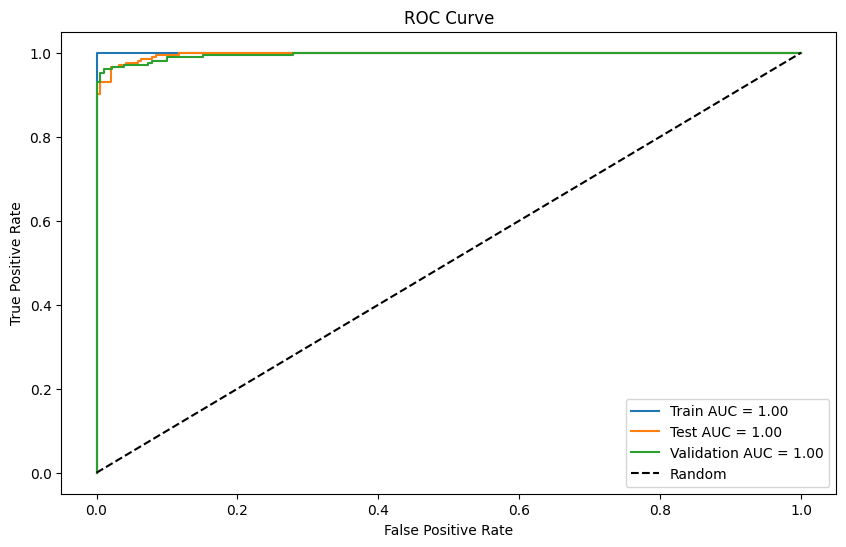

In [9]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for each class
y_train_prob = best_model.decision_function(train_features)
y_test_prob = best_model.decision_function(test_features)
y_val_prob = best_model.decision_function(validation_features)

# Compute ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(train_labels, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(test_labels, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(validation_labels, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {roc_auc_val:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [10]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [11]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_val, tpr_val, fpr) for fpr in target_fprs]

In [12]:
print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')

print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_val}')

Test
TPR at FPR 0.100: 0.995
TPR at FPR 0.010: 0.929
TPR at FPR 0.001: 0.901
             AUC: 0.9968054307676949
Train
TPR at FPR 0.100: 1.000
TPR at FPR 0.010: 1.000
TPR at FPR 0.001: 1.000
             AUC: 1.0
Validation
TPR at FPR 0.100: 0.981
TPR at FPR 0.010: 0.953
TPR at FPR 0.001: 0.929
             AUC: 0.9957837040160219
